<a href="https://colab.research.google.com/github/Kaiziferr/-Miner_Detector/blob/master/analisis_datos_mineros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diccionario de datos**
---
- `Name`: nombre de la ventana de tiempo.
- `Netflows`: cantidad de netflows en la ventana de tiempo.
- `First_Protocol`: top 1 de protocolos usados en la ventana de tiempo.
- `Second_Protocol`: top 2 de protocolos usados en la ventana de tiempo.
- `Third_Protocol`: top 3 de protocolos usados en la ventana de tiempo.
- `p1_d`: 25% de los percentiles de todas las duraciones en la ventana de tiempo
- `p2_d`: 50% de los percentiles de todas las duraciones en la ventana de tiempo
- `p3_d`: 75% de los percentiles de todas las duraciones en la ventana de tiempo
- `duration`: duración total de ventana de tiempo
- `max_d`: valor máximo de todas las duraciones en la ventana de tiempo.
- `min_d`: valor mínimo de todas las duraciones en la ventana de tiempo.
- `#packets`: número total de paquetes en la ventana de tiempo.
- `Avg_bps`: promedio de bits por sengundo en la ventana de tiempo.
- `Avg_pps`: promedio de paquetes por segundo en la ventana de tiempo.
- `Avg_bpp`: promedio de bytes por paquete en la ventana de tiempo.
- `#Bytes`: número total de bytes en la ventana de tiempo.
- `#sp`: número total de puertos de origen usados en la ventana de tiempo.
- `#dp`: número total de puertos de destino usados en la ventana de tiempo.
- `first_sp`: top 1 de los puertos de origen en la ventana de tiempo.
- `second_sp`: top 2 de los puertos de origen en la ventana de tiempo.
- `third_sp`: top 3 de los puertos de origen en la ventana de tiempo.
- `first_dp`: top 1 de los puertos de destino en la ventana de tiempo.
- `second_dp`: top 2 de los puertos de destino en la ventana de tiempo.
- `third_dp`: top 3 de los puertos de destino en la ventana de tiempo.
- `p1_ip`: 25% de los percentiles de todas las entradas de paquetes en la ventana de tiempo.
- `p2_ip`: 50% de los percentiles de todas las entradas de paquetes en la ventana de tiempo.
- `p3_ip`: 75% de los percentiles de todas las entradas de paquetes en la ventana de tiempo.
- `p1_ib`: 25% de los percentiles de todas las entradas de bytes en la ventana de tiempo.
- `p2_ib`: 50% de los percentiles de todas las entradas de bytes en la ventana de tiempo.
- `p3_ib`: 75% de los percentiles de todas las entradas de bytes en la ventana de tiempo.
- `Type`: tipo de ventana de tiempo
  - `benignas`: 0
  - `bitcash`: 1
  - `bitcoin`: 2
  - `ethereum `: 3
  - `monero`: 4
  - `litecoin`: 5


In [ ]:
def porcent_feature_nan(data):
  print(f'Columnas con valores faltantes')
  avaliable = data.isnull()
  avaliable = avaliable.apply(pd.Series.value_counts).fillna(0).T
  avaliable = avaliable[avaliable[True]>0][True]
  for i , j in enumerate(avaliable.index):
    porce_second_pr = np.round(avaliable[i] / data.shape[0], 3) * 100
    print(colored(f"""El porcentaje de los datos faltantes de la columna {j} con respecto 
    al número total de registros es de {porce_second_pr}%.\n""", attrs=['bold']))
  return avaliable

In [ ]:
def type_data_feature(data):
  data_numeric = (data.dtypes == "int64") | (data.dtypes == "float64")
  data_object  = (data.dtypes == "object")
  data_numeric = [c for c in data_numeric.index if data_numeric[c]]
  data_object = [c for c in data_object.index if data_object[c]]
  print(colored(f"""Contamos con {len(data_numeric)} caracteristicas cuantitativas y 
  {len(data_object)} categoricas \n""", attrs=['bold']))

  return data_numeric, data_object

In [ ]:
def plot_bars(data, title: str= 'feature', x_size:int=6, y_size:int=5, 
              font_size:int=15):
  fig, ax = plt.subplots(figsize = (x_size, y_size))
  fig.suptitle(f'Count plot {title}', fontsize = font_size)
  sns.countplot(x = data, ax = ax)
  len_data = data.shape[0]

  for p in ax.patches:
    height = int(p.get_height())
    porc = '{0:.2f}%'.format(height/len_data)
    plt.text(p.get_x()+p.get_width()/2., height-height*0.05, porc, ha="center", backgroundcolor='y')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from termcolor import colored


In [ ]:
data = pd.read_csv('./data/cryptojacking.csv').drop('Unnamed: 0', axis = 1)
data.drop('Name', inplace=True, axis = 1)

In [ ]:
print(colored(f'El conjunto de datos consta de {len(data.index)} registros y {len(data.columns)} columnas',  attrs=['bold']))

El conjunto de datos consta de 2837 registros y 30 columnas


# **Información preliminar**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Netflows         2837 non-null   int64  
 1   First_Protocol   2837 non-null   object 
 2   Second_Protocol  619 non-null    object 
 3   Third_Protocol   26 non-null     object 
 4   p1_d             2837 non-null   float64
 5   p2_d             2837 non-null   float64
 6   p3_d             2837 non-null   float64
 7   duration         2837 non-null   float64
 8   max_d            2837 non-null   float64
 9   min_d            2837 non-null   float64
 10  #packets         2837 non-null   int64  
 11  Avg_bps          2837 non-null   int64  
 12  Avg_pps          2837 non-null   int64  
 13  Avg_bpp          2837 non-null   int64  
 14  #Bytes           2837 non-null   int64  
 15  #sp              2837 non-null   int64  
 16  #dp              2837 non-null   int64  
 17  first_sp      

**Inspección Datos Faltantes**


In [ ]:
porcent_feature_nan(data)

Columnas con valores faltantes
El porcentaje de los datos faltantes de la columna Second_Protocol con respecto 
    al número total de registros es de 78.2%.

El porcentaje de los datos faltantes de la columna Third_Protocol con respecto 
    al número total de registros es de 99.1%.

El porcentaje de los datos faltantes de la columna second_sp con respecto 
    al número total de registros es de 0.8%.

El porcentaje de los datos faltantes de la columna third_sp con respecto 
    al número total de registros es de 72.2%.

El porcentaje de los datos faltantes de la columna second_dp con respecto 
    al número total de registros es de 0.8%.

El porcentaje de los datos faltantes de la columna third_dp con respecto 
    al número total de registros es de 72.3%.



Second_Protocol    2218.0
Third_Protocol     2811.0
second_sp            22.0
third_sp           2049.0
second_dp            22.0
third_dp           2052.0
Name: True, dtype: float64

**Inspección del tipo de variables**

In [ ]:
data_numeric, data_object = type_data_feature(data)

Contamos con 27 caracteristicas cuantitativas y 
  3 categoricas 



In [ ]:
data[data_numeric]

,Netflows,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,Avg_pps,...,first_dp,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type
0,65,18.93900,168.1730,194.28700,7845.126,244.362,0.000,5546,125708,18,...,443,80.0,123.0,3.00,7.0,22.00,127.00,255.0,1888.00,0
1,18,0.00000,0.0000,0.00000,0.086,0.044,0.000,20,148,0,...,443,53.0,53195.0,1.00,1.0,1.00,37.00,47.0,64.00,0
2,10,0.00000,0.0000,0.00000,0.000,0.000,0.000,10,236,0,...,53,39308.0,54454.0,1.00,1.0,1.00,34.00,43.0,61.75,0
3,2771,0.00000,0.0000,0.00000,8548.902,149.034,0.000,8711,129626,29,...,53,5355.0,443.0,1.00,1.0,1.00,39.00,49.0,54.00,0
4,2,0.00000,0.0000,0.00000,0.000,0.000,0.000,2,328000,1000,...,48871,53.0,NaN,1.00,1.0,1.00,37.00,41.0,45.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,2,2.15850,4.3170,6.47550,8.634,8.634,0.000,3,1179,0,...,3333,52003.0,NaN,1.25,1.5,1.75,328.25,636.5,944.75,5
2833,2,583.36850,583.8100,584.25150,1167.620,584.693,582.927,110,507,0,...,3333,52003.0,NaN,53.50,55.0,56.50,10108.75,18532.5,26956.25,5
2834,2,288.55375,288.5545,288.55525,577.109,288.556,288.553,45,397,0,...,3333,52003.0,NaN,22.25,22.5,22.75,3865.00,7165.0,10465.00,5
2835,2,285.37900,285.3790,285.37900,570.758,285.379,285.379,51,470,0,...,3333,52003.0,NaN,24.75,25.5,26.25,4627.50,8400.0,12172.50,5


- La variable `Name` no aporta información es solo referencia al archivo
- second_dp  y third_dp hacen referencia a un valor cuantitativo
- Type debe ser de tipo categorica

In [ ]:
# Transformaciones preliminares
data['Type'] = data['Type'].astype('object')
data['second_dp'] = data['second_dp'].astype('int64',  errors='ignore')
data['third_dp'] = data['third_dp'].astype('int64',  errors='ignore')

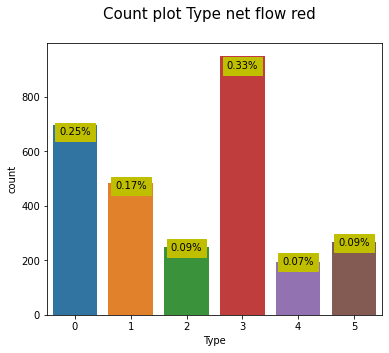

In [ ]:
plot_bars(data['Type'], 'Type net flow red')

- El conjunto no está balanceado
- La categoria con más registro es ethereum
- La categoria con menos registro es monero
- Se puede utilizar todos los registros de naturaleza minera para identificar el trafico de una de las criptomonedas estudiadas
- El 75% de los registros son de naturales maligna
- El 25% son de naturaleza benigna

# **Analisis univariado de variables categoricas**

In [ ]:
print(colored(f'Analisis descriptivo no agrupado', attrs=['bold']))
data[data_object].describe()

Analisis descriptivo no agrupado


,First_Protocol,Second_Protocol,Third_Protocol
count,2837,619,26
unique,2,3,2
top,TCP,UDP,ICMP6
freq,2702,561,23


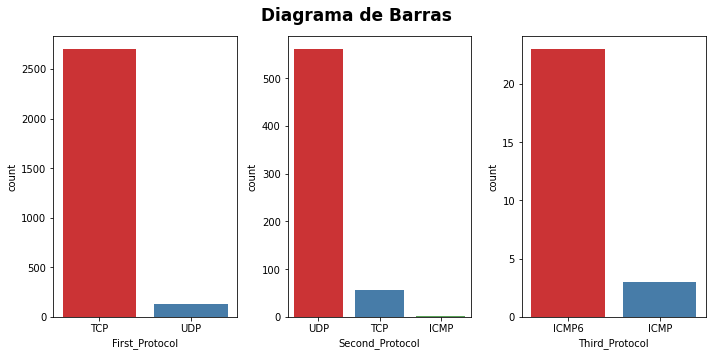

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize = (10,5))
ax = ax.flat
for i, col in enumerate(data_object):
    sns.countplot(x=col, data=data, palette="Set1", ax = ax[i])
fig.tight_layout()
plt.subplots_adjust(top = 0.90)
fig.suptitle('Diagrama de Barras', fontsize = 17, fontweight = "bold");

- En la primera grafica se presentan mas registros del protocolo **TCP** lo cual es interesante, puesto que los mineros requieren un protocolo orientado a la conexión, el cual debe verificar la correcta trasmición, que en este caso seria el host de mineria y el minero.

- En la primera grafica el protocolo que tiene más precencies es el UDP, protocolo que no suele ser usado por los mienros por su tendencia a perder información. Pero el numero de registros es inferior con respecto a la primera grafica. 

- El la ultima grafica que suele tener un portocolo (ICMP6) de IPv6 que es una nueva versión con respecto a IPV4. El protocolo suele ser asociado a detectar errores, pero tiene un numero limitado de resgistros.  